# Wine Reviews

<img src="https://m.media-amazon.com/images/M/MV5BMTg0MzgzNjU5OF5BMl5BanBnXkFtZTcwNjg0MTQ5OQ@@._V1_.jpg">

# Оценки вин 🍷

## Какие задачи решены?

😱 **Выполнил все поставленные задачи** 😱

## Подключаем библиотеки

In [585]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%precision %.4f

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20, 10)})

## Посмотрим на данные

### Качаем данные

Скачиваем [данные о винах](https://www.kaggle.com/zynicide/wine-reviews), основанные на оценках дегустаторов и общих признаках: цены, страны производства, винодельни и т.д., и не включающие физико-химические характеристики, такие как кислотность, процент содержания сахара, плотность и другие. Несмотря на это, было бы интересно рассмотреть возможность предсказания оценки вина, получаемые от дегустаторов, на основе этих общих признаков.

**Описание признаков**

* `country` — страна производства вина
* `description` — описание вина, данное дегустатором
* `designation` — виноградник винодельни, сделавшей вино
* `points` — количество очков, которые дал дегустатор вину
* `price` — стоимость бутылки вина (**дегустатор пробовал вслепую, не зная цены**)
* `province` — провинция или штат, откуда вино
* `region_1` — винодельческий район провинции или штата
* `region_2` — дополнительная более конкретная винодельческая область 
* `taster_name` — имя дегустатора
* `taster_twitter_handle` — ник дегустатора в твиттере
* `variety` — тип вина 
* `title` — название вина
* `winery` — винодельня, сделавшая вино

**Задача**

Поставим задачу **регрессии** — будем предсказывать признак `points`. 

In [586]:
wine_data = pd.read_csv('wine_reviews.csv', index_col=0)
wine_data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Количество записей: **129971**

In [587]:
wine_data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


* Видим, что **очки** идут только от 80 до 100 (на самом деле, журнал, собиравший оценки дегустаторов публиковал только вина с оценкой не меньше 80)
* У **цены** значение `max` значительно отличается от среднего (да и значение среднего и медианы достаточно разнится) — признаки наличия выбросов 

In [588]:
wine_data.isnull().sum()

country 63
description 0
designation 37465
points 0
price 8996
province 63
region_1 21247
region_2 79460
taster_name 26244
taster_twitter_handle 31213
title 0
variety 1
winery 0
dtype: int64

Достаточно много где значения пропущены. Особенно много у параметра `region_2`, но об этом было сказано в описании: `region_2` — дополнительная область, которая не всегда указывается.

In [589]:
wine_data.nunique()

country 43
description 119955
designation 37979
points 21
price 390
province 425
region_1 1229
region_2 17
taster_name 19
taster_twitter_handle 15
title 118840
variety 707
winery 16757
dtype: int64

* Количество уникальных описаний и названий меньше, чем количество записей — возможно, есть дубликаты, а также оценки одинаковых вин одними дегустаторами — необходимо понять, что делать с этими записями
* Всего дегустаторов — 19, а это значит в среднем больше 5000 оценок от одного дегустатора 🤔 (просто интересный факт)

✔️ Самостоятельно скачать данные. Для полного балла нужно выбрать данные, в которых есть пропущенные значения.

✔️ Считать данные и вывести их основные характеристики, описание признаков.

✔️ Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.

## Data Cleaning

### Удалим выбросы

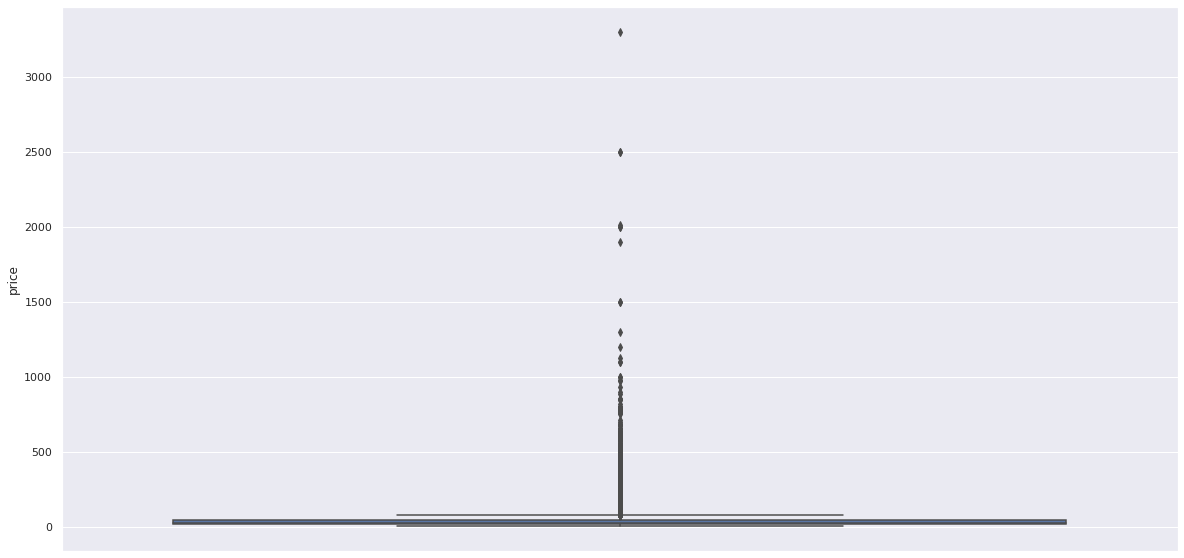

In [590]:
sns.boxplot(wine_data, y='price');

Действительно, выбросов много. Попробуем удалить данные с ценой выше 80.

In [591]:
len(wine_data[wine_data['price'] > 80]) / len(wine_data)

0.0489

5% от общего числа записей это немало, но, думаю, пока имеет смысл рассматривать данные отдельно от них — самих записей также довольно много 🙃

Удалим выбросы.

In [592]:
wine_data_clean = wine_data[wine_data['price'] <= 80]
wine_data_clean

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


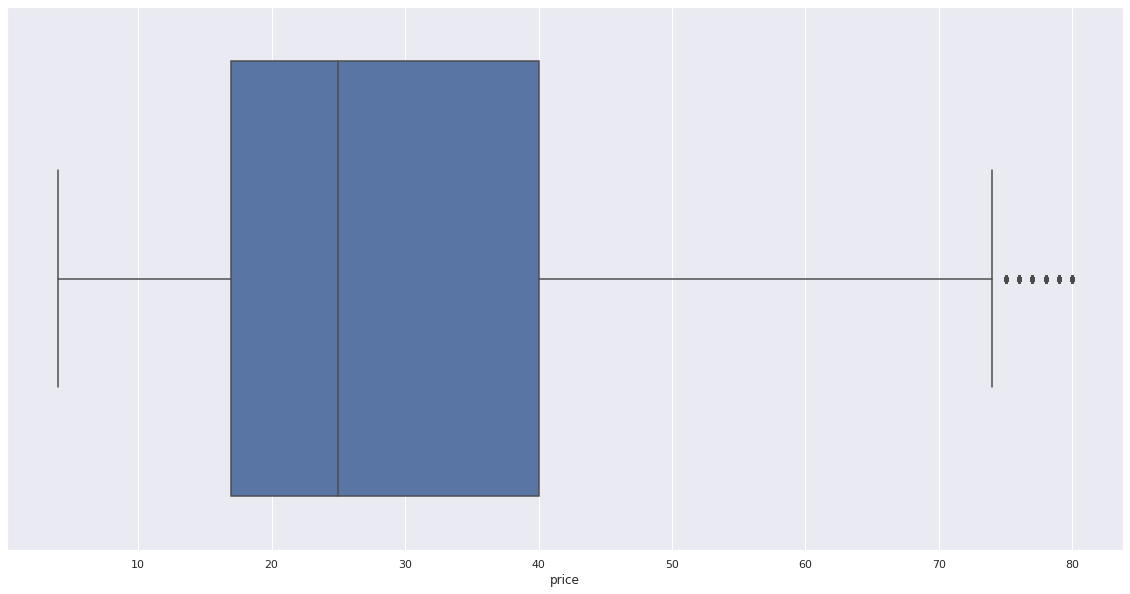

In [593]:
sns.boxplot(wine_data_clean, x='price');

### Посмотрим на возможные дубликаты

In [594]:
wine_data_clean.groupby('description')['description'].count().sort_values(ascending=False)

description
Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment. 3
Stalky aromas suggest hay and green herbs, with raspberry in the backdrop. It's hot and short in terms of mouthfeel, with herbal flavors leading the way and berry fruit running behind. Dry red fruit and herbal notes dominate the finish. 3
This zesty red has pretty aromas that suggest small red berry, blue flower and a whiff of moist soil. The vibrant palate offers sour cherry, pomegranate and a hint of anise alongside zesty acidity and refined tannins. 3
Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors of pear and honeydew melon. A salty acidity takes it to the next level. 3
Seductively tart in lemon pith, cranberry and pomegranate, this refreshing, light-bodied quaff is infinitely enjoyable, both on its own or at the table. It continues to expand on the palate into an increasing array of fresh flavors, finishing in cherry and orange. 3
 ..
Hall hits all the right notes with this unusual white Rhône blend of Grenache Blanc, Roussanne and Piquepol Blanc. It's a fascinating wine, dry and crisp, with honeyed flavors of white peach, nectarine and Meyer lemon. Tastes really good and has that all-important extra touch of complexity. 1
Half-fermented in puncheon with the rest in concrete, this thoroughly enchanting wine offers aromas of cardamom and baking spices. The flavors are broad yet supple, rich yet restrained, displaying impeccable balance and a finish that glides. 1
Half-and-half Chenin Blanc and Chardonnay gives a sparkling wine that is both fresh and creamy. Attractive apple and almond flavors are lifted by bright acidity and a tight, very crisp aftertaste. The bottling seems a little young, so drink from 2016. 1
Half-and-half Arinto and Fernão Pires, this ripe wine has lemon and pineapple fruits, along with tangy acidity. A strong herbal character gives lift as well as crispness. Drink the wine from mid-2017. 1
“Wow” is the first word that comes to mind when tasting this superconcentrated and immensely fruity wine. It practically overwhelms the nose and the palate with ripe, jammy boysenberry and blackberry, sprinkled with licorice and black-pepper nuances that add attractive complexity. It's a big wine all the way, but not extreme in alcohol. 1
Name: description, Length: 105523, dtype: int64

Видим, что одни и те же описания иногда повторяются.

Посмотрим на пример с одним и тем же описанием

In [595]:
description_example = 'Rose, red berry, mint and anise aromas unfold in the glass. The firm palate offers wild cherry, crushed raspberry, clove, anisette and a mocha note framed in bracing tannins and fresh acidity. Drink 2020–2031.'
wine_data_clean[wine_data_clean['description'] == description_example]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
83329,Italy,"Rose, red berry, mint and anise aromas unfold ...",NaN,92,64.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Cascina Bongiovanni 2011 Barolo,Nebbiolo,Cascina Bongiovanni
83560,Italy,"Rose, red berry, mint and anise aromas unfold ...",NaN,90,29.0,Piedmont,Barolo,NaN,Kerin O’Keefe,@kerinokeefe,Oddero 2011 Barolo,Nebbiolo,Oddero


Ленивый дегустатор?) Не будем это считать за дубликаты.

Посмотрим на одинаковые названия (выберем одно)

In [596]:
wine_data_clean[wine_data_clean['title'] == 'Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3209,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
4399,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
27773,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
63179,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
65584,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
81563,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
90689,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
94321,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
100738,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer
109001,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Sparkling Blend,Gloria Ferrer


Больше похоже на "дубликаты" (если брать одну цену). Видимо, бутылки отличались, но из этих данных такие отличия можно заметить  только по описанию, что трудно систематизировать. Пока не будем удалять, удалим дубликаты в конце. 

### Заполним пропущенные значения

*Да, возможно, здесь мы где-то будем аккуратно заполнять пропуски по 30-50 значений, хотя ранее легкой рукой выбросили около 6000, но это ради обучения (моего, не машинного* 🌚)

In [597]:
wine_data_clean.isnull().sum()

country 59
description 0
designation 33756
points 0
price 0
province 59
region_1 19022
region_2 66629
taster_name 23115
taster_twitter_handle 27904
title 0
variety 1
winery 0
dtype: int64

#### country & province

In [598]:
wine_data_clean[wine_data_clean['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
18075,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Askitikos Assyrtiko,Assyrtiko,Tsililis
26485,NaN,"This wine has aromas of black berry, dried red...",NaN,87,13.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
26486,NaN,Aromas of green apple and white flowers prepar...,NaN,87,14.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Teliani Valley 2015 Tsolikouri,Tsolikouri,Teliani Valley


Попробуем заполнять страну по винодельческому заводу, он известен у всех

In [599]:
winery_to_country = {}
for _, row in wine_data_clean[wine_data_clean['country'].isnull()].iterrows():
    winery = row['winery']
    if winery not in winery_to_country:
        country_data = wine_data_clean[(wine_data_clean['winery'] == winery) & (wine_data_clean['country'].notnull())]
        if len(country_data) > 0:
            winery_to_country[winery] = country_data.iloc[0]['country']
    if winery in winery_to_country:
        wine_data_clean['country'].loc[row.name] = winery_to_country[winery]

wine_data_clean[wine_data_clean['country'].isnull()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
18075,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Askitikos Assyrtiko,Assyrtiko,Tsililis
26485,NaN,"This wine has aromas of black berry, dried red...",NaN,87,13.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2013 Shiraz,Shiraz,Stone Castle
36112,NaN,An interesting blend of indigenous Bulgarian a...,Hrumki Melnik 55 Mourvèdre Marselan,89,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2012 Hrumki Melnik 55 Mourvèdre Marsel...,Red Blend,Orbelus
44850,NaN,This blend of Gamay and Prokupe has aromas of ...,Amphora,84,6.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2014 Amphora Red,Red Blend,Stone Castle
44851,NaN,This wine has aromas of honeysuckle and lemon ...,Royal,84,6.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2015 Royal Riesling,Riesling,Stone Castle


Заполнили только 25 стран... Ладно, удалим (вообще, если нужно, можно подключать интернет и искать так ¯\\\_(ツ)_/¯) 

Удалим также и `province`

In [600]:
wine_data_clean = wine_data_clean.dropna(subset=['country', 'province'])

#### variety

In [601]:
wine_data_clean.isnull().sum()

country 0
description 0
designation 33745
points 0
price 0
province 0
region_1 18963
region_2 66570
taster_name 23115
taster_twitter_handle 27904
title 0
variety 1
winery 0
dtype: int64

Ради интереса восстановим одно пропущенное значение `variety`

In [602]:
wine_data_clean[wine_data_clean['variety'].isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen


Посмотрим вина с тем же названием и той же ценой

In [603]:
wine_data_clean[(wine_data_clean['winery'] == 'Carmen') & (wine_data_clean['price'] == 17)]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86909,Chile,"A chalky, dusty mouthfeel nicely balances this...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 (Maipo Valley),NaN,Carmen
89627,Chile,This solid offering hits all the right notes w...,Reserve,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1998 Reserve Cabernet Sauvignon (Maipo ...,Cabernet Sauvignon,Carmen
122616,Chile,This Cab-Carmenère blend's more of the olive-e...,Reserve - Carmenere/Cabernet Sauvignon,84,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 1999 Reserve - Carmenere/Cabernet Sauvi...,Red Blend,Carmen


Оба этих вина $-$ красные, укажем это значение в `variety`

In [604]:
wine_data_clean[wine_data_clean['variety'].isna()] = 'Red'

#### region_1

In [605]:
wine_data_clean.isnull().sum()

country 0
description 0
designation 33744
points 0
price 0
province 0
region_1 18962
region_2 66569
taster_name 23114
taster_twitter_handle 27903
title 0
variety 0
winery 0
dtype: int64

In [606]:
wine_data_clean[wine_data_clean['region_1'].isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
36,Chile,"White flower, lychee and apple aromas carry th...",Estate,86,15.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Estampa 2011 Estate Viognier-Chardonnay (Colch...,Viognier-Chardonnay,Estampa
44,Chile,A berry aroma comes with cola and herb notes. ...,NaN,86,9.0,Maule Valley,NaN,NaN,Michael Schachner,@wineschach,Sundance 2011 Merlot (Maule Valley),Merlot,Sundance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129956,New Zealand,"The blend is 44% Merlot, 33% Cabernet Sauvigno...",Gimblett Gravels Merlot-Cabernet Sauvignon-Malbec,90,19.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Esk Valley 2011 Gimblett Gravels Merlot-Cabern...,Bordeaux-style Red Blend,Esk Valley
129958,New Zealand,This blend of Cabernet Sauvignon-Merlot and Ca...,Irongate,90,35.0,Hawke's Bay,NaN,NaN,Joe Czerwinski,@JoeCz,Babich 2010 Irongate Red (Hawke's Bay),Bordeaux-style Red Blend,Babich
129960,Portugal,"Fresh and fruity, this is full of red cherry f...",Vértice,90,48.0,Douro,NaN,NaN,Roger Voss,@vossroger,Caves Transmontanas 2006 Vértice Pinot Noir (D...,Pinot Noir,Caves Transmontanas
129963,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,20.0,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2012 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton


Посмотрим на пример записей, где `region_1` пустой для провинции **Douro**

In [607]:
wine_data_clean[wine_data_clean['province'] == 'Douro']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
608,Portugal,Verdelho and Sauvignon Blanc hangs together ea...,Verdelho and Sauvignon Blanc,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta do Portal 2012 Verdelho and Sauvignon B...,Portuguese White,Quinta do Portal
647,Portugal,"This is an impressive, powerful wine. It speak...",NaN,92,80.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta do Monte Xisto 2013 Red (Douro),Portuguese Red,Quinta do Monte Xisto
784,Portugal,"This mature wine has a soft, smooth character ...",VT '08,90,32.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta do Sagrado 2008 VT '08 Red (Douro),Portuguese Red,Quinta do Sagrado
786,Portugal,"A ripe and structured wine, this has bold blac...",Aneto Tinto,90,12.0,Douro,NaN,NaN,Roger Voss,@vossroger,Sobredos 2012 Aneto Tinto Red (Douro),Portuguese Red,Sobredos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129431,Portugal,Produced by the winemaking team of Casa Santos...,Sete Vales,89,18.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta de Porrais 2015 Sete Vales Red (Douro),Portuguese Red,Quinta de Porrais
129452,Portugal,This crisp wine is as light as a feather—fruit...,Vallado Touriga Nacional,87,23.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta do Vallado 2016 Vallado Touriga Naciona...,Rosé,Quinta do Vallado
129680,Portugal,Old vines in a field blend give a rich structu...,Monte Cascas Grande Reserva,93,39.0,Douro,NaN,NaN,Roger Voss,@vossroger,Casca Wines 2011 Monte Cascas Grande Reserva R...,Portuguese Red,Casca Wines
129864,Portugal,"A field blend from vines grown at 1290 feet, A...",Crooked Vines Colheita Branco,90,25.0,Douro,NaN,NaN,Roger Voss,@vossroger,Secret Spot Wines 2014 Crooked Vines Colheita ...,Portuguese White,Secret Spot Wines


Заполним `region_1` значением из `province`, если он пустой (эти значения совпадают и на части других данных)

In [608]:
wine_data_clean['region_1'].fillna(wine_data_clean['province'], inplace=True)

Посмотрим на количества вин из разных провинций

In [609]:
province_count = wine_data_clean.groupby('province')['province'].count()
province_count.describe()

count 422.000000
mean 271.459716
std 1789.547011
min 1.000000
25% 3.000000
50% 11.000000
75% 50.250000
max 34149.000000
Name: province, dtype: float64

Видим, что из многих провинций вин совсем немного, удалим те провинции, где вин не больше 7 

In [610]:
wine_data_clean.drop(
    wine_data_clean[wine_data_clean['province'].isin(province_count[province_count < 7].index)].index, 
    inplace=True
)

In [611]:
wine_data_clean.isnull().sum()

country 0
description 0
designation 33651
points 0
price 0
province 0
region_1 0
region_2 66099
taster_name 23100
taster_twitter_handle 27836
title 0
variety 0
winery 0
dtype: int64

✔️ (+2 балла) Произвести чистку данных (Data Cleaning). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.

## Feature Engineering

### Year

In [612]:
wine_data_clean

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Mosel,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Очень часто в названии попадается год выпуска, вытащим это значение

Уберем значения года меньше **1980**, так как все такие года $-$ части марок вин, а не год выпуска (установил перебором) 

In [613]:
wine_data_clean['year'] = np.nan
for _ in wine_data_clean:
    wine_data_clean['year'] = wine_data_clean['title'].str.extract('\D* (19\d{2}|20\d{2}) .*')

wine_data_clean['year'] = wine_data_clean['year'].astype(np.float16)

In [614]:
wine_data_clean = wine_data_clean.astype({ 
    'year': float,
    'price': float
})
wine_data_clean['year'][wine_data_clean['year'] < 1980] = np.nan

#### Попробуем восстановить некоторые года

In [615]:
wine_data_clean[wine_data_clean['year'].isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,NaN
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,NaN
237,Italy,The wine boasts a beautiful appearance thanks ...,NaN,85,18.0,Central Italy,San Marino,NaN,NaN,NaN,Consorzio Vini Tipici di San Marino NV Moscato...,Moscato,Consorzio Vini Tipici di San Marino,NaN
315,Italy,"Honey, almond blossom and citrus zest are foll...",Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Bellussi NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Bellussi,NaN
326,Italy,Drying mineral tones face off with luscious pe...,Extra Dry,86,15.0,Veneto,Prosecco di Valdobbiadene,NaN,NaN,NaN,Marsuret NV Extra Dry (Prosecco di Valdobbiad...,Prosecco,Marsuret,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129710,US,"Dark and intriguing, this wine offers notes of...",NaN,86,11.0,Virginia,Virginia,NaN,NaN,NaN,Molliver Vineyards NV Chambourcin (Virginia),Chambourcin,Molliver Vineyards,NaN
129719,France,In order to maintain freshness and crispness i...,Domaine Vieilles Vignes Brut,90,49.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Bruno Gobillard NV Domaine Vieilles Vignes Bru...,Champagne Blend,Bruno Gobillard,NaN
129743,France,"Crisp and fruity, this mature-tasting wine has...",Réserve Brut,90,70.0,Champagne,Champagne,NaN,Roger Voss,@vossroger,Castelnau NV Réserve Brut (Champagne),Champagne Blend,Castelnau,NaN
129869,US,"This wine hits the mark, combining intriguing ...",Brut,90,25.0,California,California,California Other,Jim Gordon,@gordone_cellars,Biltmore Estate NV Brut Sparkling (California),Sparkling Blend,Biltmore Estate,NaN


In [616]:
wine_data_clean['year'].isnull().sum()

3947

Попробуем восстановить год как среднее по годам, в которые винодельня выпускает вина

In [617]:
winery_to_year = {}
for _, row in wine_data_clean[wine_data_clean['year'].isna()].iterrows():
    winery = row['winery']
    if winery not in winery_to_year:
        winery_to_year[winery] = wine_data_clean[wine_data_clean['winery'] == winery]['year'].dropna().mean()
    if winery in winery_to_year and winery_to_year[winery] != np.inf:
        wine_data_clean['year'].loc[row.name] = winery_to_year[winery]

In [618]:
wine_data_clean.isnull().sum()

country 0
description 0
designation 33651
points 0
price 0
province 0
region_1 0
region_2 66099
taster_name 23100
taster_twitter_handle 27836
title 0
variety 0
winery 0
year 1062
dtype: int64

Около 3000 строк таким образом восстановили, остальное уберем) 

In [619]:
wine_data_clean = wine_data_clean.dropna(subset=['year'])
wine_data_clean

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Mosel,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2013.0
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2012.0


### variety 

Из `variety` можно было бы извлечь, например, красное вино или белое, но... 

In [620]:
wine_data_clean['variety'].str.lower().str.contains('white').sum()

4284

In [621]:
wine_data_clean['variety'].str.lower().str.contains('red').sum()

16316

Так мы получим мало данных, так что откажемся от этой идеи и удалим его потом :(

### Удалим лишние признаки

* Да, оценки скорее всего субъективны и от дегустатора многое зависит, но попытаемся от этого абстрагироваться
* От `title` больше ничего не получить, я думаю (он часто частично совпадает с названием винодельни, например, а год мы уже вынесли) 
* `description` сейчас тяжело как-то правильно и быстро разобрать, удалим...
* `region_2` и `designation` слишком специфичны и часто отсутствуют $-$ в корзину

In [622]:
wine_data_clean.drop(columns=['variety', 'taster_name', 'taster_twitter_handle', 'description', 'region_2', 'designation', 'title'], inplace=True)

✔️ (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категориальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (Feature Engineering).

## Визуализация!!!

### Анализируем признаки

In [623]:
wine_data_clean = wine_data_clean.astype({
    'points': float, 
    'price': float,
    'country': 'category',
    'province': 'category',
    'year': int
})

#### points

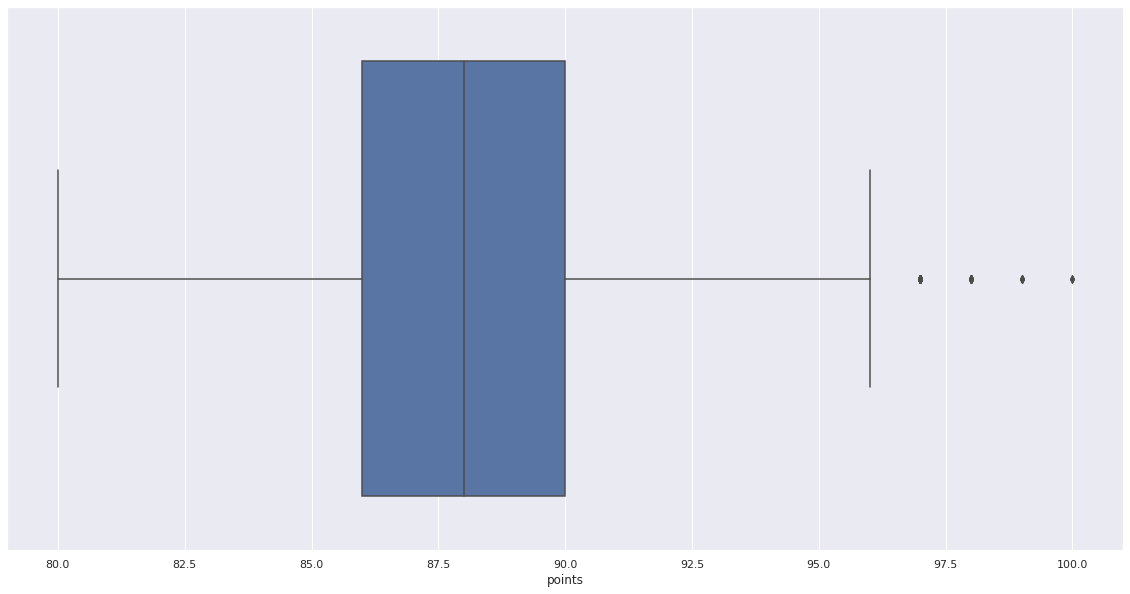

In [624]:
sns.boxplot(wine_data_clean, x='points');

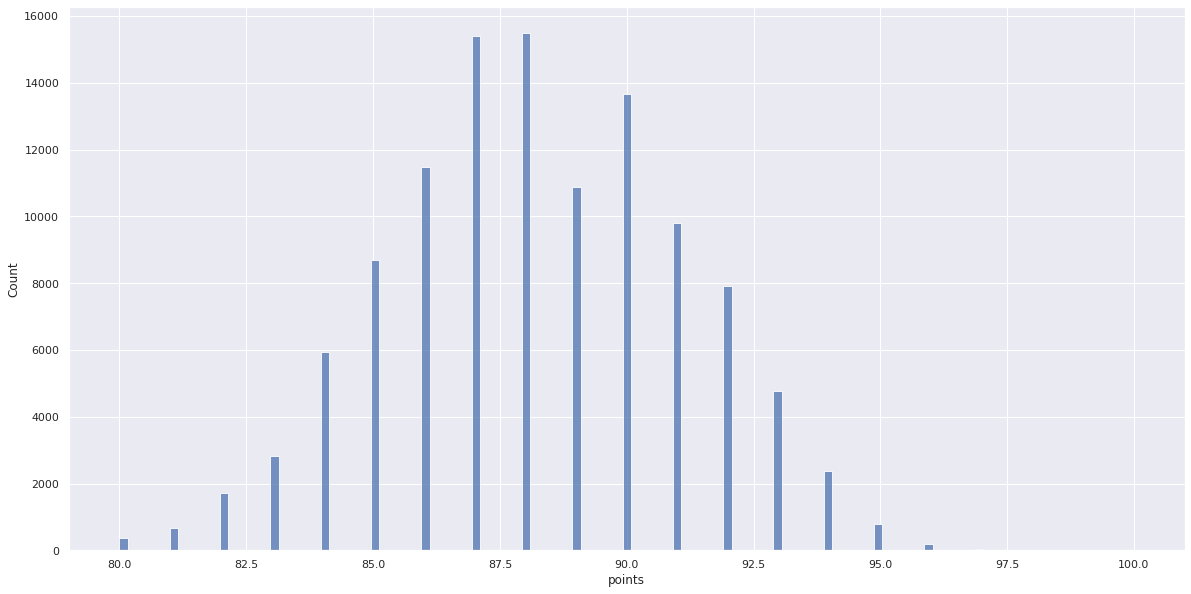

In [625]:
sns.histplot(wine_data_clean, x='points');

В целом, количества очков, большие 97 можно было бы посчитать выбросами, но попробуем оставить

#### price

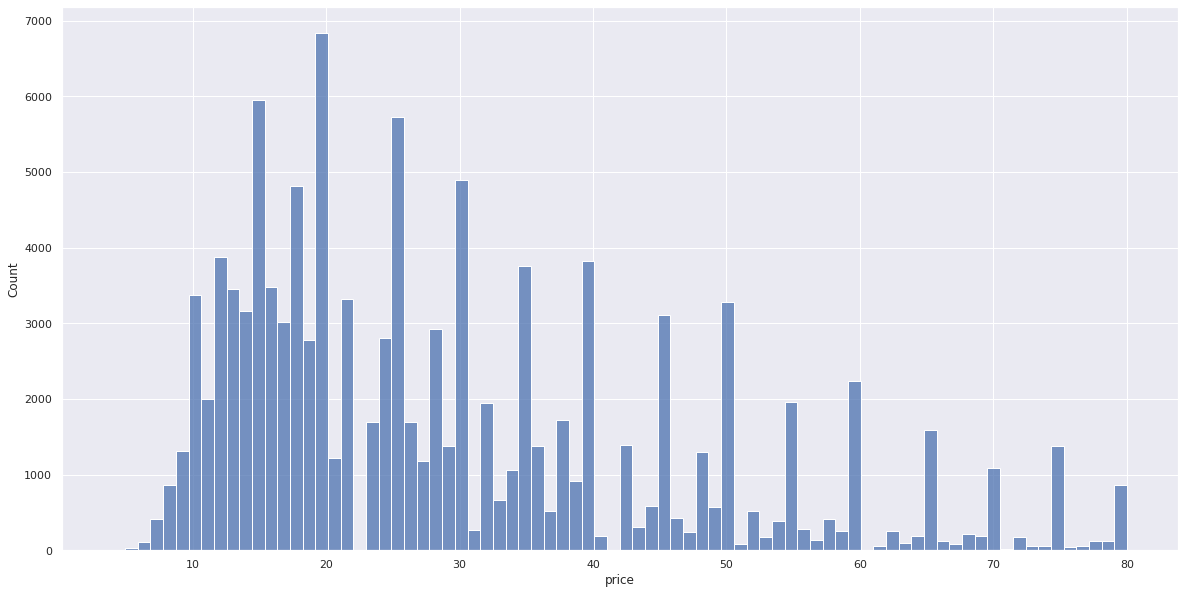

In [626]:
sns.histplot(wine_data_clean, x='price');

* Здесь мы выбросы уже удаляли
* Большие выделяющиеся пики объяснить не сложно $-$ круглые суммы)

#### year

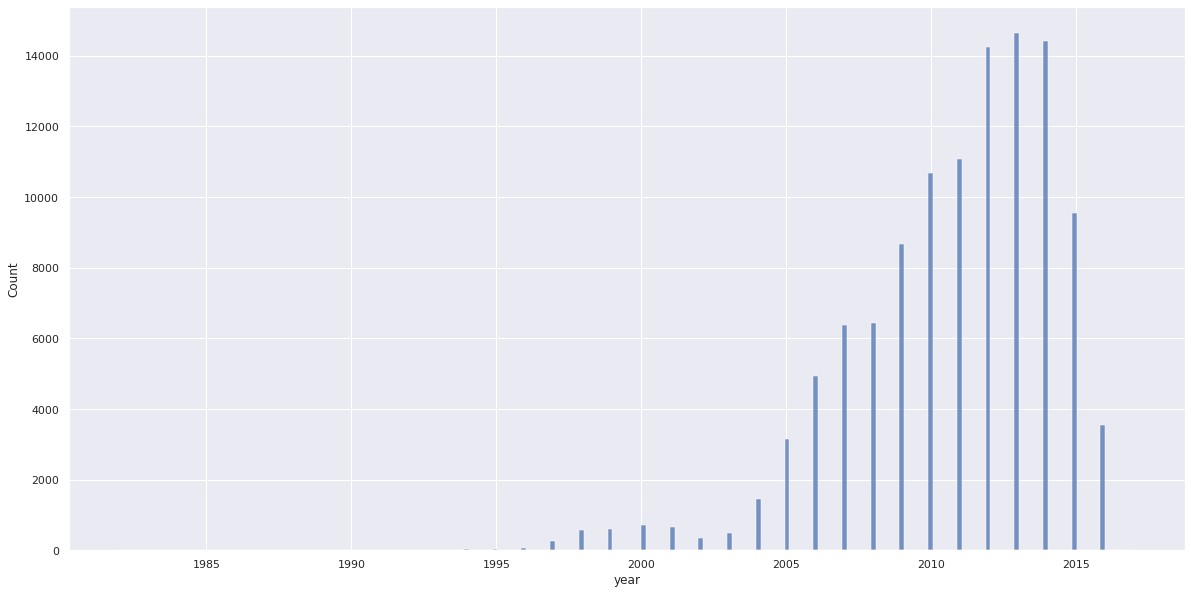

In [627]:
sns.histplot(wine_data_clean, x='year');

А вина с годами, меньше 1995 $-$ вопрос, убирать или нет... 

In [628]:
print('Количество вин с годом меньше 1995: ', len(wine_data_clean[wine_data_clean['year'] < 1995]))
print('Корреляция года и количества очков: ', wine_data_clean['year'].corr(wine_data_clean['points']))

Количество вин с годом меньше 1995:  79
Корреляция года и количества очков:  0.10022891335166872


Корреляция довольно слабая, значений мало $-$ уберем (в результате избавиться от этого столбца совсем?)

In [629]:
wine_data_clean.drop(wine_data_clean[wine_data_clean['year'] < 1995].index, inplace=True)

#### country

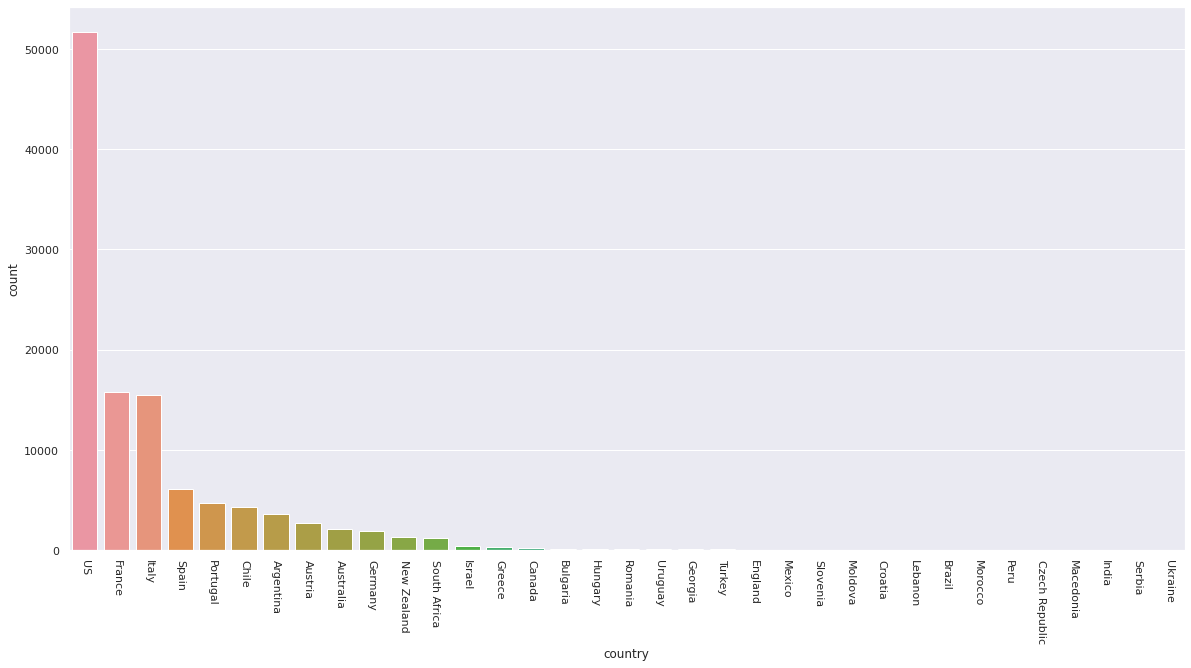

In [630]:
order = wine_data_clean.groupby('country')['points'].count().sort_values(ascending=False).index
g = sns.countplot(wine_data_clean, x='country', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
plt.show()

Тут тоже много довольно маленьких значений по количеству, но будем использовать в итоге `province`, а у них мы уже обрезали лишнее)

✔️ Провести анализ признаков, используя визуализацию (hist(), boxplot(), countplot(), barplot() и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.

### Зависимости между признаками

#### Province vs Points

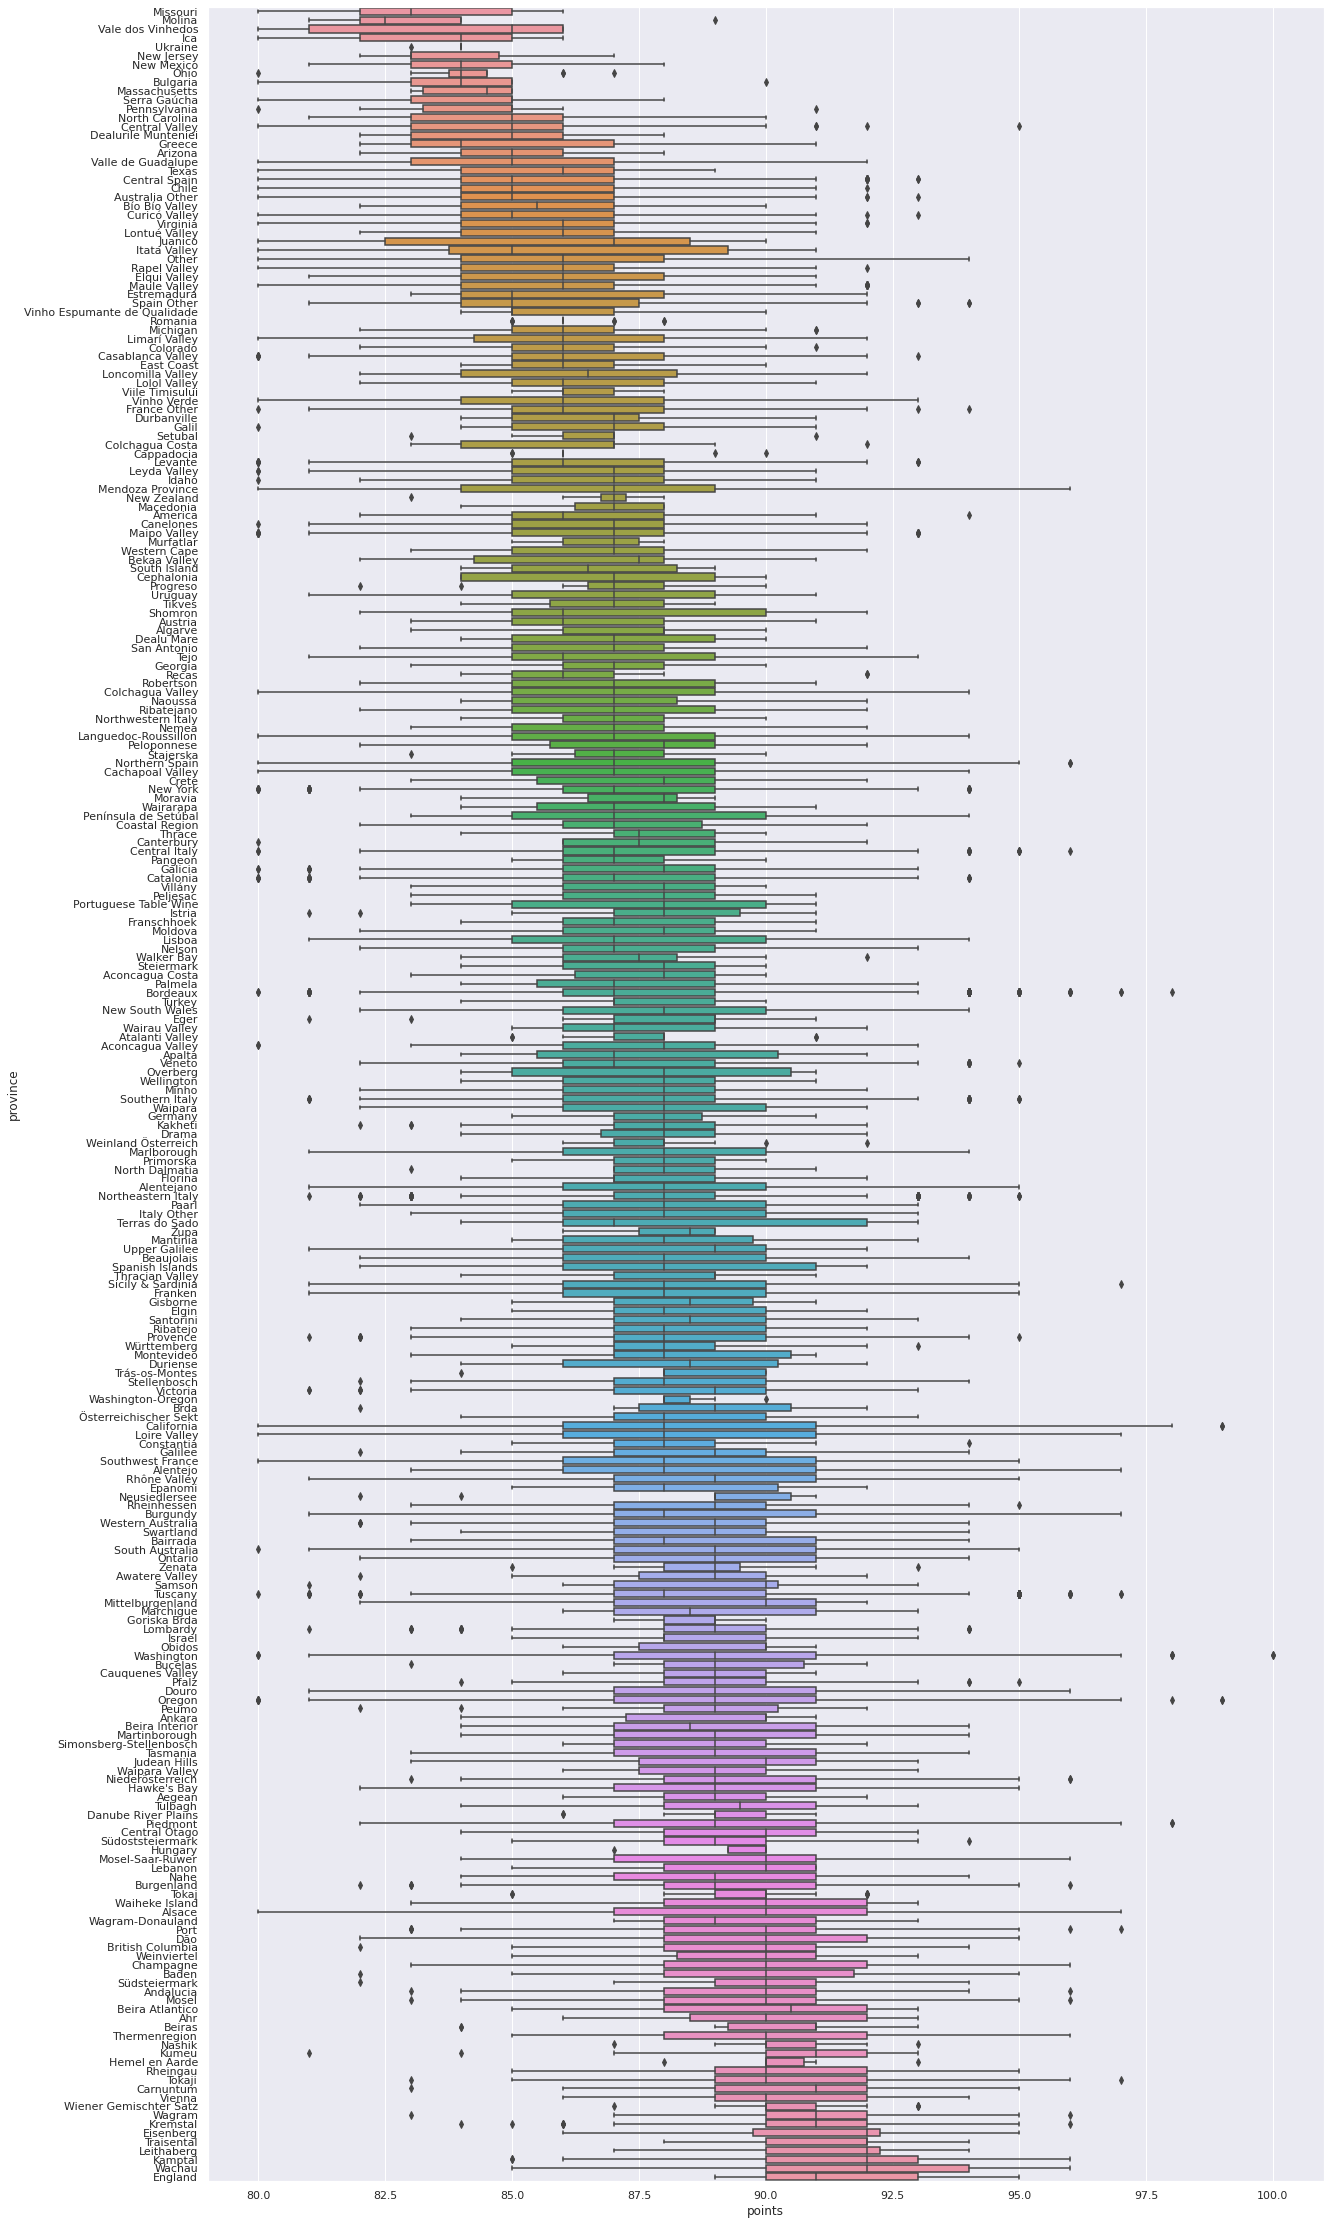

In [631]:
order = wine_data_clean.groupby('province')['points'].mean().sort_values().index
sns.boxplot(data=wine_data_clean, x='points', y='province', order=order)
fig = plt.gcf()
fig.set_size_inches(20, 40)
plt.show()

В целом, зависимость есть)

#### Country vs Points

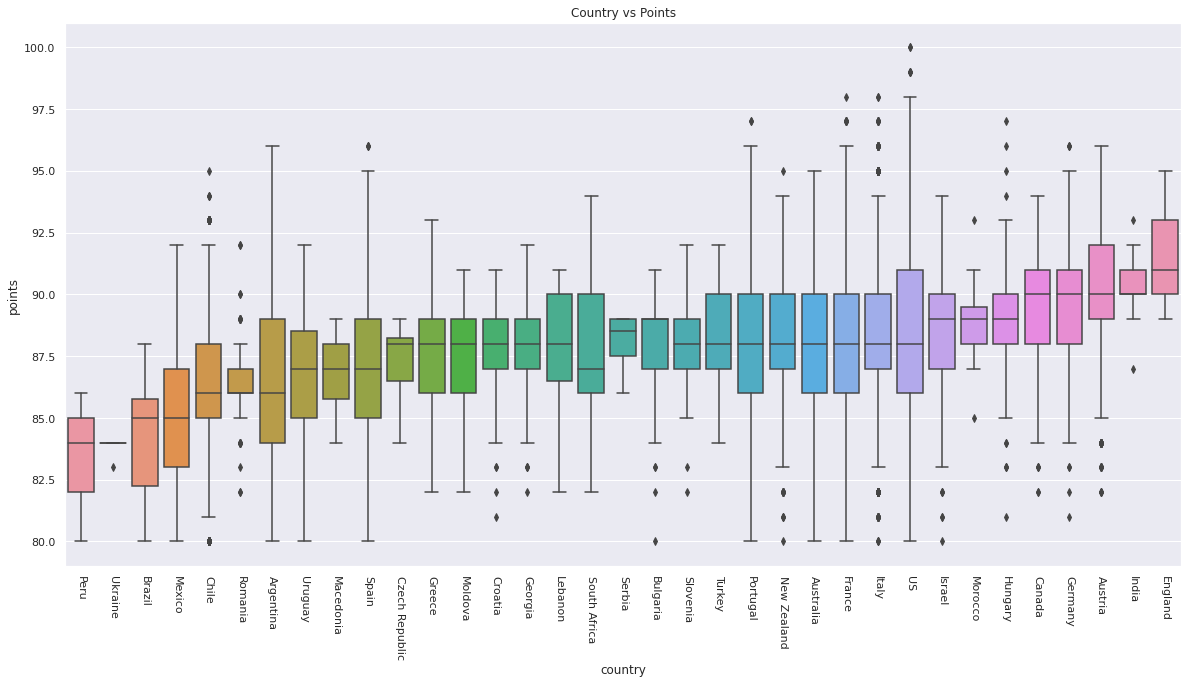

In [632]:
order = wine_data_clean.groupby('country')['points'].mean().sort_values().index
g = sns.boxplot(data=wine_data_clean, x='country', y='points', order=order)
g.set(title='Country vs Points')
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
plt.show()

Красивое... В целом, так же, как у `province`, зависимость есть

#### Year vs Points

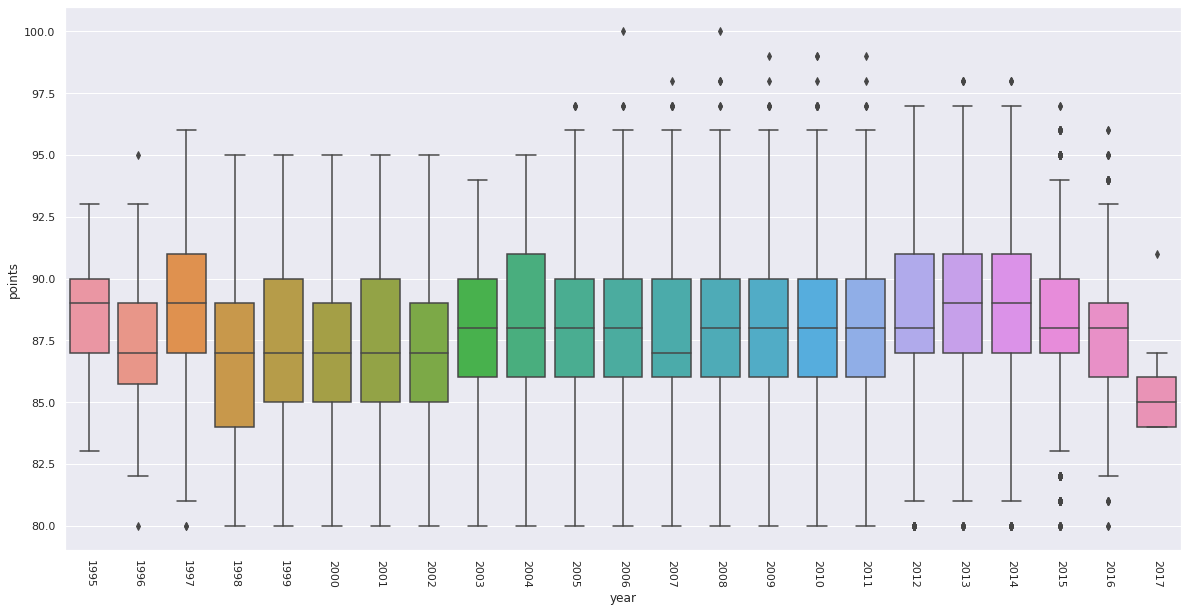

In [633]:
g = sns.boxplot(wine_data_clean, x='year', y='points')
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
plt.show()

Зависимости как таковой нет :(

#### Price vs Points

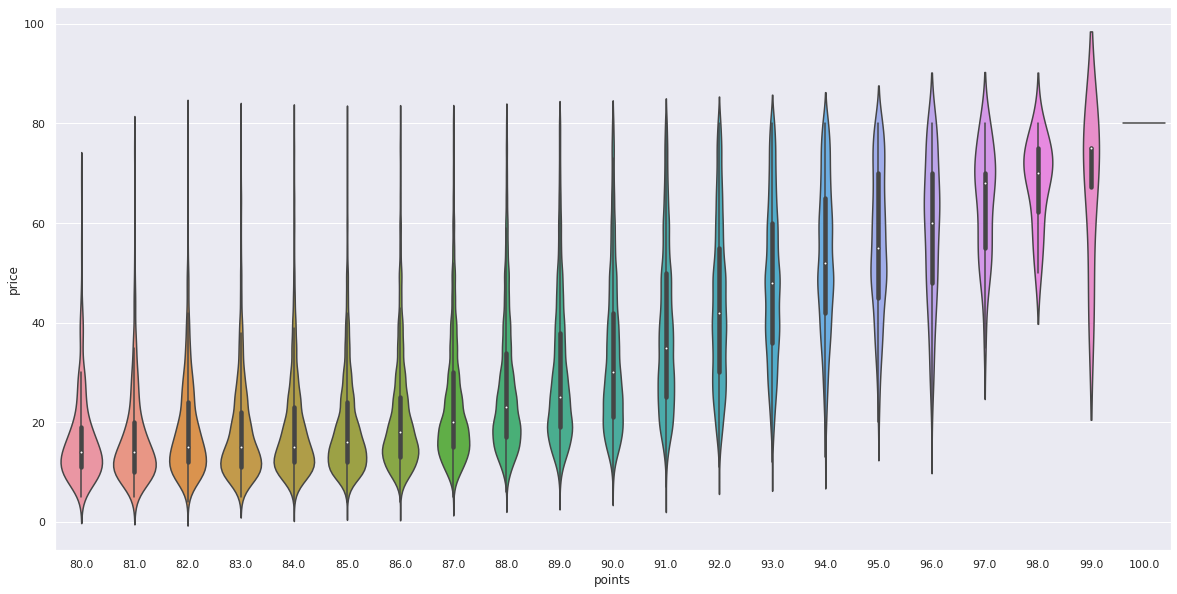

In [634]:
sns.violinplot(wine_data_clean, x='points', y='price');

Как и ожидается, корреляция присутствует

### Матрица корреляции

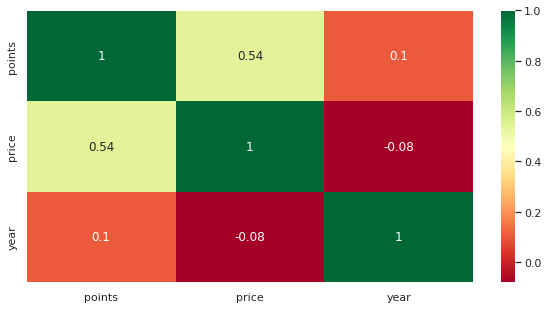

In [635]:
sns.heatmap(wine_data_clean.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Еще раз убеждаемся, что наиболее очевидная корреляция между ценой и количеством очков, в целом, есть, количество очков с годом же слабо коррелируют

✔️ (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).

## Финальные штрихи

In [636]:
wine_data_clean

,country,points,price,province,region_1,winery,year
1,Portugal,87.0,15.0,Douro,Douro,Quinta dos Avidagos,2011
2,US,87.0,14.0,Oregon,Willamette Valley,Rainstorm,2013
3,US,87.0,13.0,Michigan,Lake Michigan Shore,St. Julian,2013
4,US,87.0,65.0,Oregon,Willamette Valley,Sweet Cheeks,2012
5,Spain,87.0,15.0,Northern Spain,Navarra,Tandem,2011
...,...,...,...,...,...,...,...
129966,Germany,90.0,28.0,Mosel,Mosel,Dr. H. Thanisch (Erben Müller-Burggraef),2013
129967,US,90.0,75.0,Oregon,Oregon,Citation,2004
129968,France,90.0,30.0,Alsace,Alsace,Domaine Gresser,2013
129969,France,90.0,32.0,Alsace,Alsace,Domaine Marcel Deiss,2012


Удалим лишние столбцы, дубликаты

In [637]:
wine_data_clean.drop(columns=['country', 'winery', 'region_1'], inplace=True)
wine_data_clean = wine_data_clean.drop_duplicates()
wine_data_clean

,points,price,province,year
1,87.0,15.0,Douro,2011
2,87.0,14.0,Oregon,2013
3,87.0,13.0,Michigan,2013
4,87.0,65.0,Oregon,2012
5,87.0,15.0,Northern Spain,2011
...,...,...,...,...
129958,90.0,35.0,Hawke's Bay,2010
129959,90.0,57.0,Alsace,2010
129960,90.0,48.0,Douro,2006
129966,90.0,28.0,Mosel,2013


В целом, можно также категориальные значения перевести в числовые

In [638]:
wine_data_clean['province'].replace(
    wine_data_clean['province'].unique(), 
    range(len(wine_data_clean['province'].unique())), 
    inplace=True
)
wine_data_clean

,points,price,province,year
1,87.0,15.0,0,2011
2,87.0,14.0,1,2013
3,87.0,13.0,2,2013
4,87.0,65.0,1,2012
5,87.0,15.0,3,2011
...,...,...,...,...
129958,90.0,35.0,55,2010
129959,90.0,57.0,5,2010
129960,90.0,48.0,0,2006
129966,90.0,28.0,8,2013
